In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#IMPORT DEPENDENCIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from sklearn.utils import shuffle
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
#FILE PATH

accident_data = 'gdrive/My Drive/IRSC/accident.xlsx'
phone_data = 'gdrive/My Drive/IRSC/phone.xls'

In [0]:
def visualize_data():
  
  accdata = pd.read_excel(accident_data)
  accdata2 = accdata.values
  phoneData = pd.read_excel(phone_data)
  phoneData2 = phoneData.values
  
  fig = plt.figure(figsize = (10,10))
  ax1 = fig.add_subplot(1,2,1)
  ax2 = fig.add_subplot(1,2,2)
  
  xA = accdata2[:,1]
  yA = accdata2[:,2]
  
  xP = phoneData2[:,2]
  yP = phoneData2[:,3]
  
  ax1.scatter(xA, yA, c = "red", s = 4)
  ax1.scatter(xP, yP, c = "blue", s = 4)
  ax1.legend(['Accident', 'Phone Falling'])
  ax1.set_title('Plot of Individual Values')
  
  data_size = [xA.shape[0], xP.shape[0]]
  names = ['accident', 'phone fall']
  ax2.pie(data_size, labels = names)
  ax2.set_title('Class Distribution')
  
  return xA, yA, xP, yP

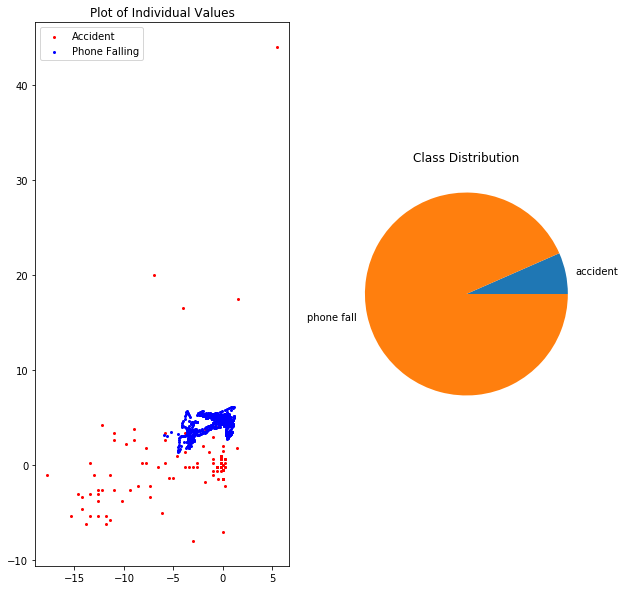

In [0]:
xA,yA,xP,yP = visualize_data()

### **DATA IS NOT LINEARLY SEPARABLE. SO WE WILL USE NEURAL NETWORKS**

In [0]:
def preprocess_data(xA,yA,xP,yP):
  
  #PREPARING INPUT AND OUTPUT VALUES FOR NEURAL NETWORK
  
  lim = np.ceil(xP.shape[0]/2)
  xp2 = np.reshape(xP, (xP.shape[0],1))
  yp2 = np.reshape(yP, (yP.shape[0],1))
  XP = np.concatenate((xp2,yp2), 1)
  XP2 = XP[:int(lim)]
  
  xa2 = np.reshape(xA, (xA.shape[0],1))
  ya2 = np.reshape(yA, (yA.shape[0],1))
  XA = np.concatenate((xa2,ya2), 1)
  
  YP = np.zeros((int(lim),1))
  YA = np.ones((XA.shape[0],1))
  
  X = np.concatenate((XA,XP2),0)
  Y = np.concatenate((YA,YP))
  
  X, Y = shuffle(X,Y)
  
  Y2 = np_utils.to_categorical(Y)
  
  return train_test_split(X,Y2,test_size = 0.1)
  
  

In [0]:
X_train,X_test,Y_train,Y_test = preprocess_data(xA,yA,xP,yP)

In [0]:
def load_model():
  
  model = Sequential()
  model.add(Dense(2,input_shape = (2,)))
  model.add(Dense(4,activation = 'relu'))
  
  #DROPOUT TO REDUCE CHANCES OF OVERFITTING
  model.add(Dropout(0.2))
  model.add(Dense(2,activation = 'softmax'))
  
  #BINARY CROSSENTROPY LOSS SINCE THIS IS BINARY CLASSIFICATION PROBLEM
  
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  return model

In [0]:
#TRAIN THE MODEL

model = load_model()
history = model.fit(X_train,Y_train,batch_size = 10, epochs = 30, validation_data = [X_test,Y_test], shuffle = True)

Train on 1283 samples, validate on 143 samples
Epoch 1/30
1283/1283 [==============================] - 0s 328us/step - loss: 0.4392 - acc: 0.7833 - val_loss: 0.3295 - val_acc: 0.9510
Epoch 2/30
1283/1283 [==============================] - 0s 113us/step - loss: 0.2884 - acc: 0.7942 - val_loss: 0.3265 - val_acc: 0.9510
Epoch 3/30
1283/1283 [==============================] - 0s 118us/step - loss: 0.2202 - acc: 0.9345 - val_loss: 0.3196 - val_acc: 0.9650
Epoch 4/30
1283/1283 [==============================] - 0s 117us/step - loss: 0.2071 - acc: 0.9602 - val_loss: 0.3107 - val_acc: 0.9650
Epoch 5/30
1283/1283 [==============================] - 0s 118us/step - loss: 0.1616 - acc: 0.9602 - val_loss: 0.3036 - val_acc: 0.9650
Epoch 6/30
1283/1283 [==============================] - 0s 119us/step - loss: 0.1520 - acc: 0.9626 - val_loss: 0.2988 - val_acc: 0.9650
Epoch 7/30
1283/1283 [==============================] - 0s 119us/step - loss: 0.1377 - acc: 0.9649 - val_loss: 0.2957 - val_acc: 0.9720
E

In [0]:
def model_performance():
  
  plt.plot(history.history['acc'], label='train')
  plt.plot(history.history['val_acc'], label='test')

  plt.legend()
  plt.show()

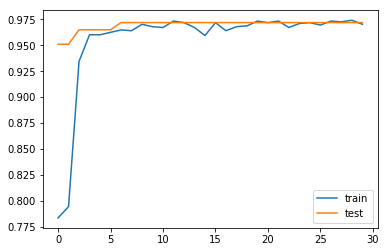

In [0]:
model_performance()

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')